In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

In [2]:
def load_data(path, transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')
    y = y.reshape(y.shape[0])
    X = data.get('X')
    if transpose:
        X = np.array([im.reshape((20,20)).T for im in X])
        X = np.array([im.reshape(400) for im in X])  # flatten
    return X,y

In [25]:
path = r"E:\chrome download\paper\ex3data1.mat"
X, y = load_data(path)

print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [11]:
def plot_an_image(image):
    """image:(400,)"""
    fig, ax = plt.subplots(figsize=(1,1))
    ax.matshow(image.reshape((20,20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

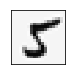

this is 5


In [13]:
pick_one = np.random.randint(0,5000)
plot_an_image(X[pick_one,:])
plt.show()
print("this is {}".format(y[pick_one]))

In [17]:
def plot_100_image():
    for i in range(100):
        pick_one = np.random.randint(0,5000)
        plot_an_image(X[pick_one,:])
        plt.show()

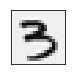

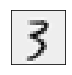

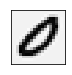

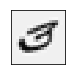

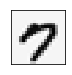

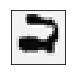

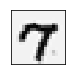

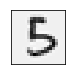

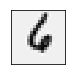

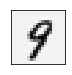

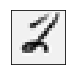

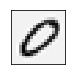

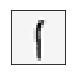

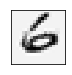

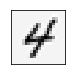

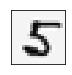

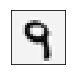

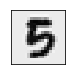

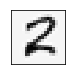

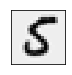

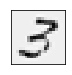

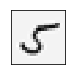

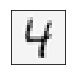

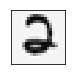

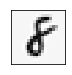

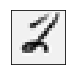

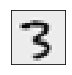

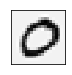

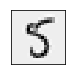

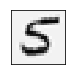

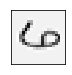

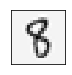

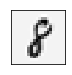

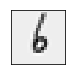

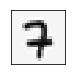

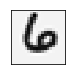

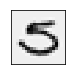

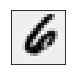

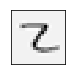

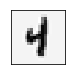

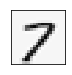

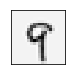

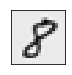

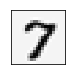

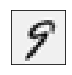

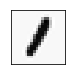

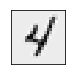

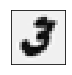

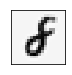

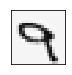

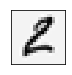

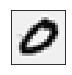

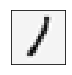

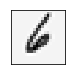

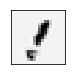

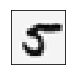

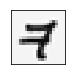

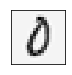

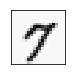

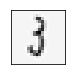

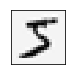

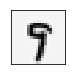

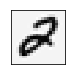

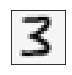

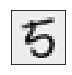

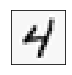

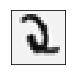

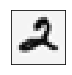

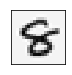

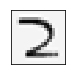

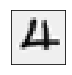

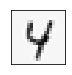

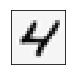

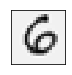

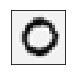

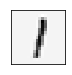

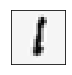

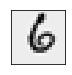

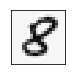

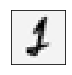

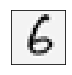

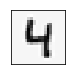

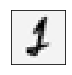

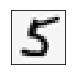

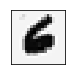

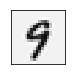

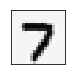

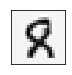

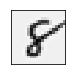

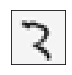

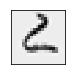

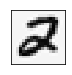

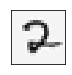

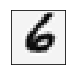

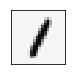

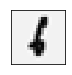

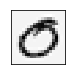

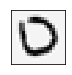

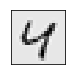

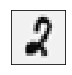

In [18]:
plot_100_image()

In [26]:
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
X.shape

(5000, 401)

In [27]:
y_matrix = []
for k in range(1,11):
    y_matrix.append((y==k).astype(int))
    
y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)

In [28]:
y.shape

(10, 5000)

In [29]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

# train 1 model（训练一维模型）

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def cost(theta, X, y):
    loss = - y*np.log(sigmoid(X@theta)) - (1-y)*np.log(sigmoid(1-X@theta))
    return np.mean(loss)

def regularized_cost(theta, X, y, l=1):
    theta_ = theta[1:]   # theta 0 不需要乘法
    regu = (1/(2*len(X))) * np.power(theta_, 2).sum()
    return cost(theta, X, y) + regu

def gradient(theta, X, y):
    # one batch
    return (1/len(X)) * X.T @ (sigmoid(X@theta)-y)
    
def regularized_gradient(theta, X, y, l=1):
    theta_ = theta[1:]
    regu_theta = (1/len(X)) * theta_
    
    # by doing this, no offset is on theta_0
    regu_term = np.concatenate([np.array([0]), regu_theta])
    
    return gradient(theta, X, y) + regu_term

def logistic_regression(X, y, l=1):
    """generalized logistic regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    theta = np.zeros(X.shape[1])
    
    # t rain
    res = opt.minimize(fun=regularized_cost,
                      x0=theta,
                      args=(X,y,1),
                      jac=regularized_gradient,
                      options={'disp':True})
    final_theta = res.x
    return final_theta

In [42]:
def predict(x, theta):
    prob = sigmoid(x@theta)
    return (prob >= 0.5).astype(int)

In [40]:
t0 = logistic_regression(X, y[0])  # 1-d model

         Current function value: 0.023247
         Iterations: 36
         Function evaluations: 94
         Gradient evaluations: 83


In [43]:
print(t0.shape)
y_pred = predict(X, t0)
print('Accuracy={}'.format(np.mean(y[0] == y_pred)))

(401,)
Accuracy=0.9926


# K-d model

In [46]:
k_theta = np.array([logistic_regression(X,y[k]) for k in range(10)])
print(k_theta.shape)

         Current function value: 0.023247
         Iterations: 36
         Function evaluations: 94
         Gradient evaluations: 83
         Current function value: 0.034355
         Iterations: 11
         Function evaluations: 67
         Gradient evaluations: 56
         Current function value: 0.068792
         Iterations: 25
         Function evaluations: 147
         Gradient evaluations: 135
         Current function value: 0.069827
         Iterations: 27
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.051277
         Iterations: 35
         Function evaluations: 137
         Gradient evaluations: 125
         Current function value: 0.078434
         Iterations: 28
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 0.034783
         Iterations: 39
         Function evaluations: 117
         Gradient evaluations: 106
         Current function value: 0.061215
         Ite

## predict


In [63]:
X.shape, k_theta.shape

((5000, 401), (10, 401))

In [64]:
prob_matrix = sigmoid(X@k_theta.T)
np.set_printoptions(suppress=True)
prob_matrix

array([[0.99562888, 0.00000823, 0.00012911, ..., 0.00140306, 0.00009421,
        0.00008232],
       [0.9848181 , 0.00002268, 0.00001136, ..., 0.00159795, 0.00000829,
        0.00000292],
       [0.9579604 , 0.00000096, 0.00016331, ..., 0.00025374, 0.10276884,
        0.001802  ],
       ...,
       [0.00000531, 0.00645336, 0.00401707, ..., 0.00245669, 0.01281534,
        0.54255622],
       [0.00001237, 0.00000888, 0.00000021, ..., 0.06612599, 0.03007223,
        0.76899573],
       [0.03606401, 0.00000312, 0.00159184, ..., 0.09022099, 0.05077815,
        0.11736682]])

In [65]:
#返回沿轴axis最大值的索引，axis=1代表行
y_pred = np.argmax(prob_matrix, axis=1)

In [58]:
y_pred.shape, y.shape

((5000,), (10, 5000))

In [66]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

In [60]:
y_answer = y[1].copy()
y_answer.shape

(5000,)

In [67]:
np.sum(y_answer==y_answer)

5000

In [62]:
y_pred[:10], y_answer[:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [61]:
print(classification_report(y_answer, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.12      0.21      4500
           1       0.91      0.96      0.94       500
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.20      5000
   macro avg       0.19      0.11      0.11      5000
weighted avg       0.99      0.20      0.28      5000



![1](https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes/raw/4235cf10673207669f92cf9d952936bc70517edd/code/img/nn_model.png)

In [68]:
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

In [69]:
path = "E:\chrome download\paper\ex3weights.mat"
theta1, theta2 = load_weight(path)

theta1.shape, theta2.shape

((25, 401), (10, 26))

In [72]:
path = "E:\chrome download\paper\ex3data1.mat"
X, y = load_data(path, transpose=False)

X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)  # intercept

X.shape, y.shape

((5000, 401), (5000,))

feed forward  公式

In [73]:
a1 = X
z2 = a1 @ theta1.T # (5000, 401) @ (25,401).T = (5000, 25)
z2 = np.insert(z2, 0, values=np.ones(z2.shape[0]), axis=1)
a2 = sigmoid(z2)   # activation (5000, 26)
z3 = a2 @ theta2.T
a3 = sigmoid(z3)

In [74]:
a3

array([[0.00013825, 0.0020554 , 0.00304012, ..., 0.00049102, 0.00774326,
        0.99622946],
       [0.00058776, 0.00285027, 0.00414688, ..., 0.00292311, 0.00235617,
        0.99619667],
       [0.00010868, 0.0038266 , 0.03058551, ..., 0.07514539, 0.0065704 ,
        0.93586278],
       ...,
       [0.06278247, 0.00450406, 0.03545109, ..., 0.0026367 , 0.68944816,
        0.00002744],
       [0.00101909, 0.00073436, 0.00037856, ..., 0.01456166, 0.97598976,
        0.00023337],
       [0.00005908, 0.00054172, 0.0000259 , ..., 0.00700508, 0.73281465,
        0.09166961]])

In [75]:

y_pred = np.argmax(a3, axis=1) + 1  # numpy is 0 base index, +1 for matlab convention，返回沿轴axis最大值的索引，axis=1代表行
y_pred.shape

(5000,)

In [76]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

